# Problem RP8 
## In this Notebook, we present the RP8 problem of BBRC 2019 using the FORM SORM method and the Monte Carlo method

In [1]:
import openturns as ot
import numpy as np

We define the parameters of the inputs

In [2]:
parameters1 = ot.LogNormalMuSigma(120, 12, 0.0)
X1 = ot.ParametrizedDistribution(parameters1)

parameters2 = ot.LogNormalMuSigma(120, 12, 0.0)
X2 = ot.ParametrizedDistribution(parameters2)

parameters3 = ot.LogNormalMuSigma(120, 12, 0.0)
X3 = ot.ParametrizedDistribution(parameters3)

parameters4 = ot.LogNormalMuSigma(120, 12, 0.0)
X4 = ot.ParametrizedDistribution(parameters4)

parameters5 = ot.LogNormalMuSigma(50, 10, 0.0)
X5 = ot.ParametrizedDistribution(parameters5)

parameters6 = ot.LogNormalMuSigma(40, 8, 0.0)
X6 = ot.ParametrizedDistribution(parameters6)

In [3]:
Y = X1 + 2 * X2 + 2 * X3 + X4 - 5 * X5 - 5 * X6

In [4]:
Y.computeCDF(0.0)

0.0007897927545598295

We are dealing with the following cases 

$
\left\{
    \begin{array}{ll}
        g(X) = X_1 + 2X_2 + 2X_3 +X_4 - 5X_5 - 5X_6  \\
        g(X) = 0 \\
        X_2 = 0 \\ 
        X_3 = 0 \\
        X_4 = 0 \\
        X_6 = 0
    \end{array}
\right.
$
$
\\



We transform the inputs X1 and X5 in the standard space


$
\left\{
    \begin{array}{ll}
        g(X) = X_1 - 5X_5  \\
        g(X) = 0 
        \\
    \end{array}
\right.
$

On pose :

$
\left\{
    \begin{array}{ll}
        R = X_1   \\
        S = 5X_5 
        \\
    \end{array}
\right.
$



We do the transformation in standard space:

$
\left\{
    \begin{array}{ll}
        R = X_1   \\
        S = 5X_5 
        \\
    \end{array}
\right.
$
$
\\
\Rightarrow
\\
$
$
\left\{
    \begin{array}{ll}
        U = \frac{R-mu_R}{\sigma_R}   \\
        V = \frac{S-mu_S}{\sigma_S}
        \\
    \end{array}
\right.
$

In [5]:

mu1 = X1.getMean()[0]
mu5 = X5.getMean()[0]

sigma1 = X1.getStandardDeviation()[0]
sigma5 = X5.getStandardDeviation()[0]

In [6]:
U1 = (X1 - mu1) / sigma1
U2 = (X5 - mu5) / sigma5

In [7]:
x1 = U1.getSample(5000)
y1 = U2.getSample(5000)

We declare two circles of iso-probable

$f_{R S}(u, v)=\frac{1}{2 \pi \sigma_{R} \sigma_{s}} \exp \left\{-\frac{1}{2}\left[u^{2}+v^{2}\right]\right\}$

We calculate the radii of the iso-probable curves for two constants
$\alpha1 = 0.00001$ et $\alpha2 = 0.000001$ 

$f_{R S}(u, v) = \alpha1$ 

$f_{R S}(u, v) = \alpha2$ 

In [8]:
alpha1 = 0.00001
alpha2 = 0.000001

The rays of circles :
$r^2  = u^2+ v^2$

In [9]:
p = -2 * np.log(2 * np.pi * alpha1 * 5 * sigma1 * sigma5)
q = -2 * np.log(2 * np.pi * alpha2 * 5 * sigma1 * sigma5)

In [10]:
theta = np.linspace(0, 2 * np.pi, 100)

rp = np.sqrt(p)

xp = rp * np.cos(theta)
yp = rp * np.sin(theta)

rq = np.sqrt(q)

xq = rq * np.cos(theta)
yq = rq * np.sin(theta)

We defended the function de $g(x)=0$ 

So :

$g=G(u, v)=\sigma_{R} u-\sigma_{S} v+\left(\mu_{R}-\mu_{S}\right)$

In [11]:
def h(x):
    m = (sigma1 * x + (5 * mu5 - mu1)) / (5 * sigma5)
    return m

In [12]:
x2 = np.arange(-5, 15, 1)

y2 = h(x2)

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(11, 11))
plt.scatter(x1, y1, c="green", marker=".", label=" v en fonction de u ")
plt.plot(xq, yq, c="green", label=" la densité conjointe est constante = alpha 1")
plt.plot(x2, y2, label="g(x)=x1-5*x5, x2=x3=x4=x6=0")
plt.plot(xp, yp, c="red", label=" la densité conjointe est constante = alpha2")
plt.xlabel(" u ")
plt.ylabel(" v ")
plt.title(" Courbe de g(x) et les courbes iso-probables")
plt.legend(loc="best")
plt.show()

<Figure size 1100x1100 with 1 Axes>

Nous définissons la fonction de performance 

In [14]:
def f(x):
    g = x[0] + 2 * x[1] + 2 * x[2] + x[3] - 5 * x[4] - 5 * x[5]
    y = [g]
    return y

In [15]:
myDistribution = ot.ComposedDistribution([X1, X2, X3, X4, X5, X6])

In [16]:
mu = myDistribution.getMean()

In [17]:
myFunction = ot.PythonFunction(6, 1, f)

In [18]:
vect = ot.RandomVector(myDistribution)
output = ot.CompositeRandomVector(myFunction, vect)
event = ot.ThresholdEvent(output, ot.Less(), 0)

In [19]:
# Methode FORM
solver = ot.AbdoRackwitz()
algo = ot.FORM(solver, event, mu)
algo.run()
result = algo.getResult()

In [20]:
result.getEventProbability()

0.0006598990293279676

In [21]:
# Nombre d'appel à la fonction f
myFunction.getEvaluationCallsNumber()

93

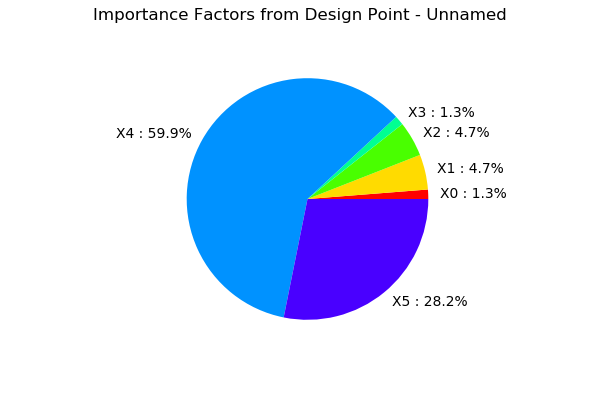

In [22]:
result.drawImportanceFactors()

In [23]:
# Méthode importance sampling
standardSpaceDesignPoint = result.getStandardSpaceDesignPoint()
myImportance = ot.Normal(standardSpaceDesignPoint, [1.0] * 6, ot.CorrelationMatrix(6))
experiment = ot.ImportanceSamplingExperiment(myImportance)
algo = ot.ProbabilitySimulationAlgorithm(ot.StandardEvent(event), experiment)
algo.setMaximumCoefficientOfVariation(0.1)
algo.setMaximumOuterSampling(40000)
algo.setConvergenceStrategy(ot.Full())
algo.run()

In [24]:
result = algo.getResult()
result.getProbabilityEstimate()

0.0007864805264978173

In [25]:
# Nombre d'appel à la fonction f
myFunction.getEvaluationCallsNumber()

490

In [26]:
# Méthode SORM
solver = ot.AbdoRackwitz()
algo = ot.SORM(solver, event, mu)
algo.run()
result = algo.getResult()

In [27]:
result.getEventProbabilityBreitung()

0.0007837001404406786

In [28]:
# Nombre d'appel à la fonction f
myFunction.getEvaluationCallsNumber()

680

In [29]:
# Méthode de Monte Carlo
experiment = ot.MonteCarloExperiment()
algo = ot.ProbabilitySimulationAlgorithm(event, experiment)
algo.setMaximumCoefficientOfVariation(0.05)
algo.setMaximumOuterSampling(int(1e5))
algo.run()
result = algo.getResult()
probability = result.getProbabilityEstimate()

In [30]:
probability

0.0007700000000000091

In [31]:
# Nombre d'appel à la fonction
myFunction.getEvaluationCallsNumber()

100680